In [1]:
from sqlalchemy import create_engine
postgres_str = 'postgresql://postgres:joisel90@@localhost:5432/Employee_db'
cnx = create_engine(postgres_str)

import pandas as pd
emp = pd.read_sql("SELECT * FROM employees", cnx)

In [2]:
emp

,emp_no,employee_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [3]:
paym = pd.read_sql("SELECT * FROM salaries", cnx)


In [4]:
paym

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [5]:
title=pd.read_sql("SELECT * FROM title", cnx)


In [6]:
title

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


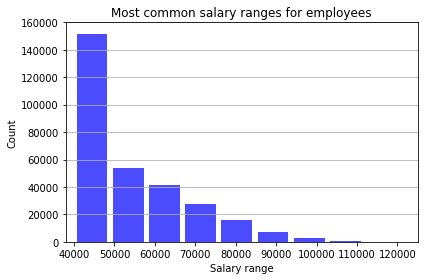

In [24]:
import matplotlib.pyplot as plt
n = plt.hist(x=paym['salary'], color='b', alpha=0.7, rwidth=0.85)
plt.title('Most common salary ranges for employees')
plt.xlabel("Salary range")
plt.ylabel("Count")
plt.xlim(37999,125000,1000)
plt.ylim(0,160000,1000)
plt.grid(axis='y')
plt.tight_layout()

In [8]:
emp_sal=pd.merge(emp,paym,on='emp_no',how='inner')
emp_sal

,emp_no,employee_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [9]:
empl_ttl=emp_sal.groupby('employee_title_id')['salary'].mean()
empl_ttl

employee_title_id
e0001    48564.434447
e0002    48535.336511
e0003    48506.799871
e0004    48582.896092
m0001    51531.041667
s0001    58465.382850
s0002    58550.172704
Name: salary, dtype: float64

In [10]:
empl_ttl=pd.DataFrame(empl_ttl)
empl_ttl.reset_index(inplace=True)
empl_ttl.columns=['title_id','Avg Salary']


In [11]:
empl_ttl

,title_id,Avg Salary
0,e0001,48564.434447
1,e0002,48535.336511
2,e0003,48506.799871
3,e0004,48582.896092
4,m0001,51531.041667
5,s0001,58465.382850
6,s0002,58550.172704


In [12]:
ttl_sal=pd.merge(empl_ttl,title,on='title_id',how='inner')
ttl_sal

,title_id,Avg Salary,title
0,e0001,48564.434447,Assistant Engineer
1,e0002,48535.336511,Engineer
2,e0003,48506.799871,Senior Engineer
3,e0004,48582.896092,Technique Leader
4,m0001,51531.041667,Manager
5,s0001,58465.382850,Staff
6,s0002,58550.172704,Senior Staff


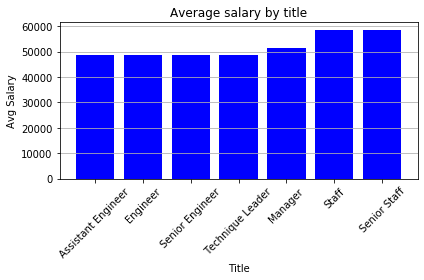

In [22]:
plt.bar(ttl_sal['title'], ttl_sal['Avg Salary'], color='b')
plt.xticks(rotation=45)
plt.title("Average salary by title")
plt.xlabel("Title")
plt.ylabel("Avg Salary")
plt.grid(axis='y')
plt.tight_layout()